<a href="https://colab.research.google.com/github/akmal1994/Capstone---Classification/blob/main/Credit_Card_Default_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting whether a customer will default on his/her credit card </u></b>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## <b> Problem Description </b>

### This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the [K-S chart](https://www.listendata.com/2019/07/KS-Statistics-Python.html) to evaluate which customers will default on their credit card payments


## <b> Data Description </b>

### <b>Attribute Information: </b>

### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
* ### X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* ### X2: Gender (1 = male; 2 = female).
* ### X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* ### X4: Marital status (1 = married; 2 = single; 3 = others).
* ### X5: Age (year).
* ### X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* ### X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* ### X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
pip install --upgrade xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
raw_df = pd.read_excel('/content/drive/MyDrive/Alma Better/Capstone Projects/Supervised ML -Classification/default of credit card clients.xls')
df = pd.read_excel('/content/drive/MyDrive/Alma Better/Capstone Projects/Supervised ML -Classification/default of credit card clients.xls', header=1)

In [5]:
raw_df.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [6]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


# Basic EDA

### Dataset Exploration

In [7]:
df.shape

(30000, 25)

In [8]:
pd.options.display.max_columns = 50

In [9]:
df.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,6,50000,1,1,2,37,0,0,0,0,0,0,64400,57069,57608,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,7,500000,1,1,2,29,0,0,0,0,0,0,367965,412023,445007,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
7,8,100000,2,2,2,23,0,-1,-1,0,0,-1,11876,380,601,221,-159,567,380,601,0,581,1687,1542,0
8,9,140000,2,3,1,28,0,0,2,0,0,0,11285,14096,12108,12211,11793,3719,3329,0,432,1000,1000,1000,0
9,10,20000,1,3,2,35,-2,-2,-2,-2,-1,-1,0,0,0,0,13007,13912,0,0,0,13007,1122,0,0


In [10]:
df.isna().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [12]:
cat_cols = ['SEX', 'EDUCATION', 'MARRIAGE']

In [13]:
df[cat_cols] = df[cat_cols].astype(str)

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0
PAY_5,30000.0,-0.266200,1.133187,-2.0,-1.00,0.0,0.00,8.0
PAY_6,30000.0,-0.291100,1.149988,-2.0,-1.00,0.0,0.00,8.0
BILL_AMT1,30000.0,51223.330900,73635.860576,-165580.0,3558.75,22381.5,67091.00,964511.0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          30000 non-null  int64 
 1   LIMIT_BAL                   30000 non-null  int64 
 2   SEX                         30000 non-null  object
 3   EDUCATION                   30000 non-null  object
 4   MARRIAGE                    30000 non-null  object
 5   AGE                         30000 non-null  int64 
 6   PAY_0                       30000 non-null  int64 
 7   PAY_2                       30000 non-null  int64 
 8   PAY_3                       30000 non-null  int64 
 9   PAY_4                       30000 non-null  int64 
 10  PAY_5                       30000 non-null  int64 
 11  PAY_6                       30000 non-null  int64 
 12  BILL_AMT1                   30000 non-null  int64 
 13  BILL_AMT2                   30000 non-null  in

In [16]:
df.EDUCATION.value_counts()#.plot(kind='bar', figsize=(12,8))

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [17]:
df['EDUCATION'].replace({'5':'4', '6':'4', '0':'4'}, inplace=True)

In [18]:
df.SEX.value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

In [19]:
df.MARRIAGE.value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [20]:
df.MARRIAGE.replace({'0':'3'}, inplace=True)

In [21]:
df.MARRIAGE.value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

### Visual Representation

In [22]:
# plot function
def plot_binned(col, title, bin_num):
    bins=np.linspace(min(df[col]), max(df[col]), bin_num)
    print(bins)
    labels=['B'+str(i) for i in range(bin_num-1)]
    # binning
    df[col+'_bin']=pd.cut(df[col], bins, labels=labels, include_lowest=True)
    return df.groupby(col+'_bin')['default payment next month'].value_counts(normalize=True).unstack().plot(kind='bar', title=title, figsize=(12,6));

[  10000.  257500.  505000.  752500. 1000000.]


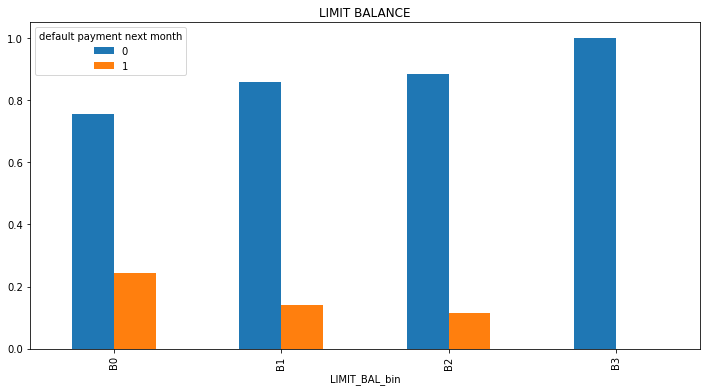

In [23]:
plot_binned('LIMIT_BAL', 'LIMIT BALANCE', 5);

[21.         40.33333333 59.66666667 79.        ]


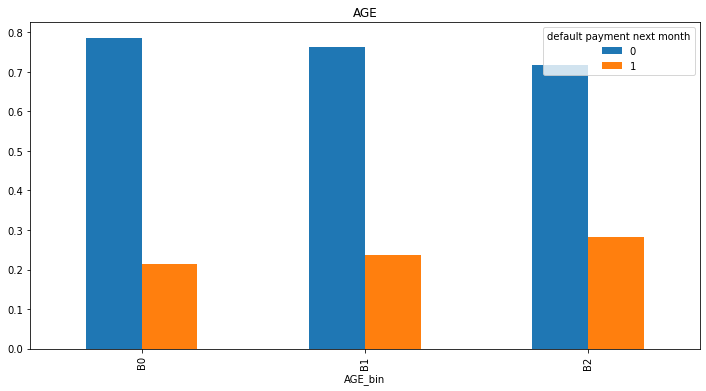

In [24]:
plot_binned('AGE', 'AGE', 4)

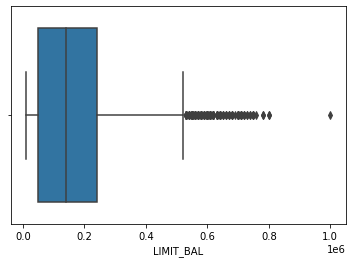

In [25]:
sns.boxplot(df.LIMIT_BAL);

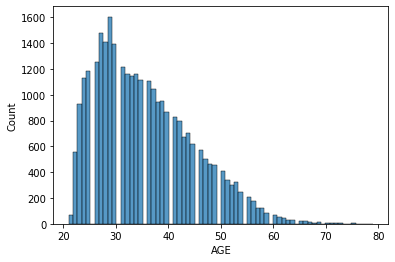

In [26]:
sns.histplot(df.AGE)

In [27]:
cols = df.describe().columns
cols

Index(['ID', 'LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default payment next month'],
      dtype='object')

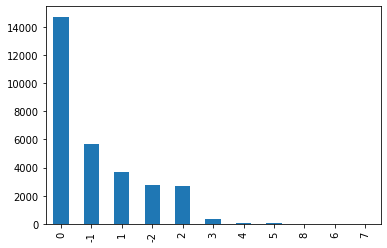

In [28]:
df.PAY_0.value_counts().plot(kind='bar')

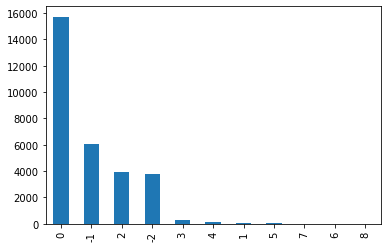

In [29]:
df.PAY_2.value_counts().plot(kind='bar')

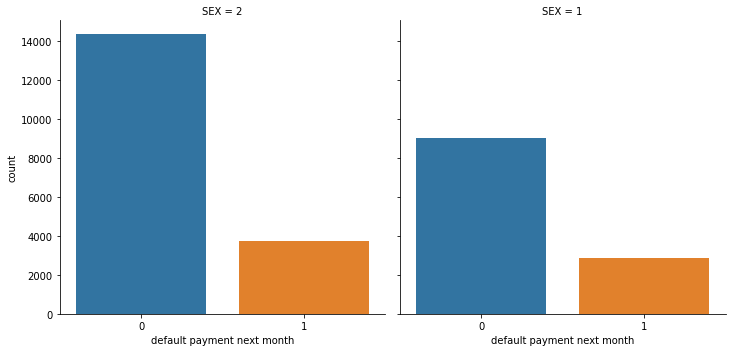

In [30]:
sns.factorplot("default payment next month", col='SEX', col_wrap=3, data=df, kind='count');

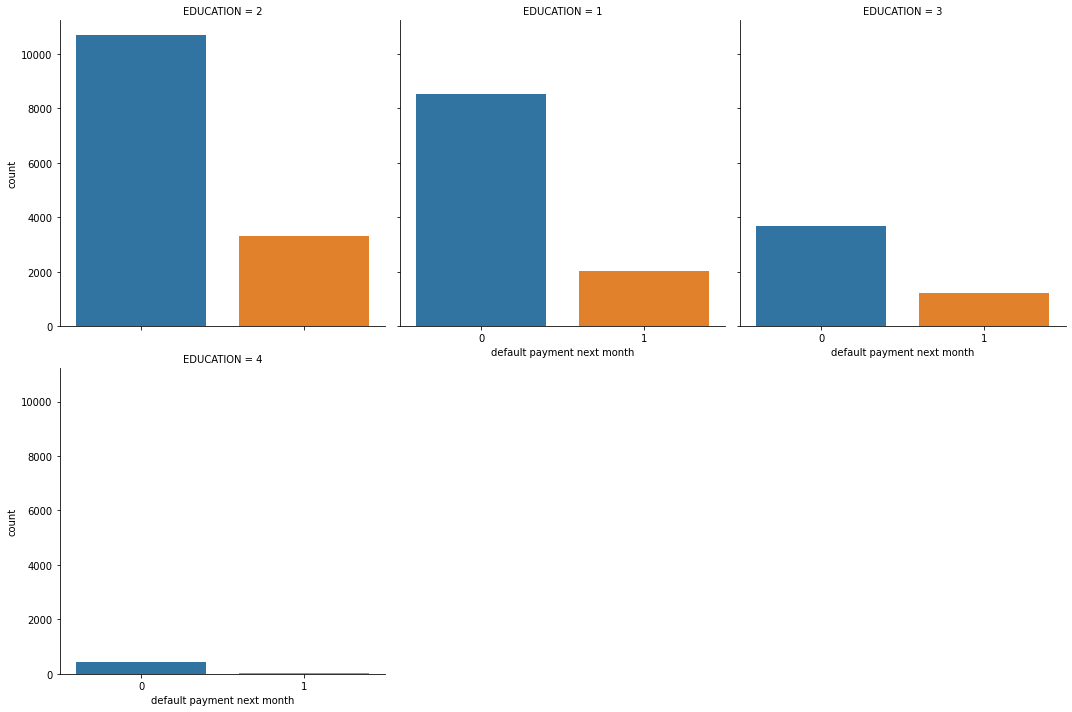

In [31]:
sns.factorplot("default payment next month", col='EDUCATION', col_wrap=3, data=df, kind='count');

# Feature Engineering

### Splitting target and independent variables

In [32]:
X = df.drop(['ID', 'default payment next month', 'LIMIT_BAL_bin', 'AGE_bin'], axis=1)
y = df['default payment next month']

In [33]:
X.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [34]:
X = pd.get_dummies(X, columns=cat_cols, drop_first=True)
X.head()

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX_2,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_2,MARRIAGE_3
0,20000,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,1,0,0,0,0
1,120000,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,1,0,0,1,0
2,90000,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,1,1,0,0,1,0
3,50000,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,1,1,0,0,0,0
4,50000,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,1,0,0,0,0


# Model Building

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from collections import Counter
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, plot_roc_curve
from imblearn.over_sampling import ADASYN
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, StratifiedKFold

In [36]:
Counter(y)

Counter({1: 6636, 0: 23364})

From above we can say that the data is imbalanced. Let's try to build a model without treating imbalanced dataset, then we will treat the imbalance class and train our model and check the performance before and after treating imbalance class.

### First try to build model as it is

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_train = pd.DataFrame(X_train, columns=X_test.columns)

X_test = sc.transform(X_test)
X_test = pd.DataFrame(X_test, columns=X_train.columns)

#### Logistic Regression

In [38]:
log_reg = LogisticRegression()

parameters = [{'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']},
              {'penalty':['none', 'elasticnet', 'l1', 'l2']},
              {'C':[0.001, 0.01, 0.1, 1, 10, 100]}]



log_rscv_search = RandomizedSearchCV(log_reg,
                            parameters,
                            scoring='roc_auc',
                            cv=5,
                            n_iter = 60,
                            random_state=10,
                            n_jobs=4,
                            refit=True)


log_rscv_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=60, n_jobs=4,
                   param_distributions=[{'solver': ['newton-cg', 'lbfgs',
                                                    'liblinear', 'sag',
                                                    'saga']},
                                        {'penalty': ['none', 'elasticnet', 'l1',
                                                     'l2']},
                                        {'C': [0.001, 0.01, 0.1, 1, 10, 100]}],
                   random_state=10, scoring='roc_auc')

In [39]:
log_model = log_rscv_search.best_estimator_

In [40]:
log_model.fit(X_train, y_train)
log_train_pred = log_model.predict(X_train)
log_test_pred = log_model.predict(X_test)

In [41]:
print(f"Accuracy for training set is \n{accuracy_score(y_train, log_train_pred)}")
print('\n')
print(f"Accuracy for test set is \n{accuracy_score(y_test, log_test_pred)}")

Accuracy for training set is 
0.810625


Accuracy for test set is 
0.8148333333333333


In [42]:
print(f"Classification report for training \n \n{classification_report(y_train, log_train_pred)}")

Classification report for training 
 
              precision    recall  f1-score   support

           0       0.82      0.97      0.89     18668
           1       0.72      0.24      0.36      5332

    accuracy                           0.81     24000
   macro avg       0.77      0.61      0.62     24000
weighted avg       0.80      0.81      0.77     24000



In [43]:
print(f"Classification report for testing \n \n{classification_report(y_test, log_test_pred)}")

Classification report for testing 
 
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      4696
           1       0.72      0.24      0.36      1304

    accuracy                           0.81      6000
   macro avg       0.77      0.61      0.63      6000
weighted avg       0.80      0.81      0.78      6000



---

#### Decision Tree

In [44]:
param_grid = {
    'max_depth': np.arange(3,15),
    'criterion': ['gini', 'entropy'],
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}

dtree = DecisionTreeClassifier()

dtree_rscv = RandomizedSearchCV(dtree, 
                           param_grid, 
                           scoring= 'roc_auc',
                           cv = 5,
                           random_state = 10, 
                           refit=True)
dtree_rscv.fit(X_train,y_train)

dt_model = dtree_rscv.best_estimator_
dt_model

DecisionTreeClassifier(max_depth=11, min_samples_leaf=100,
                       min_samples_split=100)

In [45]:
dt_model.fit(X_train, y_train)

dtree_pred_train = dt_model.predict(X_train)
dtree_pred_test = dt_model.predict(X_test)

print(f"Accuracy for training set is \n{accuracy_score(y_train, dtree_pred_train)}")
print('\n')
print(f"Accuracy for test set is \n{accuracy_score(y_test, dtree_pred_test)}")
print('\n')
print(f"Classification report for training: \n \n{classification_report(y_train, dtree_pred_train)}")
print('\n')
print(f"Classification report for testing: \n \n{classification_report(y_test, dtree_pred_test)}")

Accuracy for training set is 
0.8230833333333333


Accuracy for test set is 
0.82


Classification report for training: 
 
              precision    recall  f1-score   support

           0       0.84      0.96      0.89     18668
           1       0.70      0.36      0.48      5332

    accuracy                           0.82     24000
   macro avg       0.77      0.66      0.68     24000
weighted avg       0.81      0.82      0.80     24000



Classification report for testing: 
 
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4696
           1       0.66      0.36      0.46      1304

    accuracy                           0.82      6000
   macro avg       0.75      0.65      0.68      6000
weighted avg       0.80      0.82      0.80      6000



---

#### Random Forest

In [46]:
param_grid = param_grid = { 
    'n_estimators': [200, 300,400,500,600],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}


RF = RandomForestClassifier()


rscv_rf = RandomizedSearchCV(RF, param_grid, 
                    cv=3,scoring='roc_auc',
                    random_state=10,
                    refit=True)
rscv_rf.fit(X_train, y_train)
rf_model = rscv_rf.best_estimator_
rf_model

RandomForestClassifier(max_depth=8, max_features='log2', n_estimators=400)

In [47]:
rf_model.fit(X_train, y_train)

ranf_pred_train = rf_model.predict(X_train)
ranf_pred_test = rf_model.predict(X_test)

print(f"Accuracy for training set is \n{accuracy_score(y_train, ranf_pred_train)}")
print('\n')
print(f"Accuracy for test set is \n{accuracy_score(y_test, ranf_pred_test)}")
print('\n')
print(f"Classification report for training: \n \n{classification_report(y_train, ranf_pred_train)}")
print('\n')
print(f"Classification report for testing: \n \n{classification_report(y_test, ranf_pred_test)}")

Accuracy for training set is 
0.8362916666666667


Accuracy for test set is 
0.8226666666666667


Classification report for training: 
 
              precision    recall  f1-score   support

           0       0.85      0.96      0.90     18668
           1       0.76      0.39      0.51      5332

    accuracy                           0.84     24000
   macro avg       0.80      0.68      0.71     24000
weighted avg       0.83      0.84      0.82     24000



Classification report for testing: 
 
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4696
           1       0.67      0.37      0.48      1304

    accuracy                           0.82      6000
   macro avg       0.75      0.66      0.68      6000
weighted avg       0.81      0.82      0.80      6000



---

#### Knn

In [48]:
k_range = list(range(1,31))
weight_options = ["uniform", "distance"]

param_grid = dict(n_neighbors = k_range, weights = weight_options)
#print (param_grid)
knn = KNeighborsClassifier()

knn_rscv = RandomizedSearchCV(knn, param_grid, cv = 5, scoring = 'roc_auc')
knn_rscv.fit(X_train,y_train)

knn_model = knn_rscv.best_estimator_

In [49]:
knn_model.fit(X_train, y_train)

knn_pred_train = knn_model.predict(X_train)
knn_pred_test = knn_model.predict(X_test)

print(f"Accuracy for training set is \n{accuracy_score(y_train, knn_pred_train)}")
print('\n')
print(f"Accuracy for test set is \n{accuracy_score(y_test, knn_pred_test)}")
print('\n')
print(f"Classification report for training: \n \n{classification_report(y_train, knn_pred_train)}")
print('\n')
print(f"Classification report for testing: \n \n{classification_report(y_test, knn_pred_test)}")

Accuracy for training set is 
0.8162083333333333


Accuracy for test set is 
0.8133333333333334


Classification report for training: 
 
              precision    recall  f1-score   support

           0       0.83      0.96      0.89     18668
           1       0.70      0.30      0.42      5332

    accuracy                           0.82     24000
   macro avg       0.77      0.63      0.66     24000
weighted avg       0.80      0.82      0.79     24000



Classification report for testing: 
 
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      4696
           1       0.66      0.29      0.40      1304

    accuracy                           0.81      6000
   macro avg       0.75      0.62      0.65      6000
weighted avg       0.79      0.81      0.78      6000



---

#### Gradient Boosting

In [50]:
from scipy import stats

In [51]:
# set up the model
gbm = GradientBoostingClassifier(random_state=0)

# determine the hyperparameter space
param_grid = dict(
    n_estimators=stats.randint(10, 120),
    min_samples_split=stats.uniform(0, 1),
    max_depth=stats.randint(1, 5),
    loss=('deviance', 'exponential'),
    )

# set up the search
gbm_rscv = RandomizedSearchCV(gbm,
                            param_grid,
                            scoring='roc_auc',
                            cv=5,
                            n_iter = 60,
                            random_state=10,
                            n_jobs=4,
                            refit=True)

# find best hyperparameters
gbm_rscv.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=0),
                   n_iter=60, n_jobs=4,
                   param_distributions={'loss': ('deviance', 'exponential'),
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f48e945b650>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f48e945b350>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f48e945bfd0>},
                   random_state=10, scoring='roc_auc')

In [52]:
gbm_model = gbm_rscv.best_estimator_

In [53]:
gbm_model.fit(X_train, y_train)

gbm_pred_train = gbm_model.predict(X_train)
gbm_pred_test = gbm_model.predict(X_test)

print(f"Accuracy for training set is \n{accuracy_score(y_train, gbm_pred_train)}")
print('\n')
print(f"Accuracy for test set is \n{accuracy_score(y_test, gbm_pred_test)}")
print('\n')
print(f"Classification report for training: \n \n{classification_report(y_train, gbm_pred_train)}")
print('\n')
print(f"Classification report for testing: \n \n{classification_report(y_test, gbm_pred_test)}")

Accuracy for training set is 
0.8229166666666666


Accuracy for test set is 
0.8226666666666667


Classification report for training: 
 
              precision    recall  f1-score   support

           0       0.84      0.95      0.89     18668
           1       0.68      0.38      0.49      5332

    accuracy                           0.82     24000
   macro avg       0.76      0.66      0.69     24000
weighted avg       0.81      0.82      0.80     24000



Classification report for testing: 
 
              precision    recall  f1-score   support

           0       0.85      0.94      0.89      4696
           1       0.66      0.39      0.49      1304

    accuracy                           0.82      6000
   macro avg       0.75      0.67      0.69      6000
weighted avg       0.81      0.82      0.80      6000



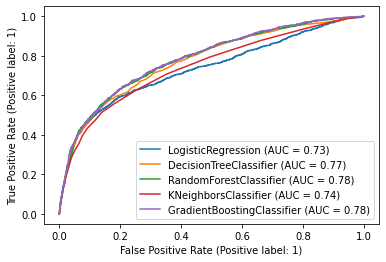

In [54]:
roc=plot_roc_curve(log_model,X_test,y_test)
plot_roc_curve(dt_model,X_test,y_test,ax=roc.ax_);
plot_roc_curve(rf_model,X_test,y_test,ax=roc.ax_);
plot_roc_curve(knn_model,X_test,y_test,ax=roc.ax_);
plot_roc_curve(gbm_model,X_test,y_test,ax=roc.ax_);

## With handling class imbalanced

In [55]:
ada = ADASYN(random_state=42)
X_res, y_res = ada.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({1: 23940, 0: 23364})


In [56]:
X_train, X_test, y_train, y_test = train_test_split(X_res,y_res, test_size=0.3, random_state=12)

#### Logistic Regression

In [57]:
log_reg = LogisticRegression()

parameters = [{'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']},
              {'penalty':['none', 'elasticnet', 'l1', 'l2']},
              {'C':[0.001, 0.01, 0.1, 1, 10, 100]}]



log_rscv_search = RandomizedSearchCV(log_reg,
                            parameters,
                            scoring='roc_auc',
                            cv=5,
                            n_iter = 60,
                            random_state=10,
                            n_jobs=4,
                            refit=True)


log_rscv_search.fit(X_train, y_train)
log_model = log_rscv_search.best_estimator_

In [58]:
log_model.fit(X_train, y_train)
log_train_pred = log_model.predict(X_train)
log_test_pred = log_model.predict(X_test)

In [59]:
print(f"Accuracy for training set is \n{accuracy_score(y_train, log_train_pred)}")
print('\n')
print(f"Accuracy for test set is \n{accuracy_score(y_test, log_test_pred)}")
print('\n')
print(f"Classification report for training \n \n{classification_report(y_train, log_train_pred)}")
print('\n')
print(f"Classification report for testing \n \n{classification_report(y_test, log_test_pred)}")

Accuracy for training set is 
0.7386748006764919


Accuracy for test set is 
0.7357666290868095


Classification report for training 
 
              precision    recall  f1-score   support

           0       0.73      0.75      0.74     16385
           1       0.75      0.73      0.74     16727

    accuracy                           0.74     33112
   macro avg       0.74      0.74      0.74     33112
weighted avg       0.74      0.74      0.74     33112



Classification report for testing 
 
              precision    recall  f1-score   support

           0       0.72      0.75      0.74      6979
           1       0.75      0.72      0.74      7213

    accuracy                           0.74     14192
   macro avg       0.74      0.74      0.74     14192
weighted avg       0.74      0.74      0.74     14192



#### Decision Tree

In [60]:
param_grid = {
    'max_depth': range(5, 15, 10),
    'criterion': ['gini', 'entropy'],
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}

dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 5, 
                           verbose = 1)
grid_search.fit(X_train,y_train)

dt_model = grid_search.best_estimator_

Fitting 5 folds for each of 8 candidates, totalling 40 fits


In [61]:
dt_model.fit(X_train, y_train)

dtree_pred_train = dt_model.predict(X_train)
dtree_pred_test = dt_model.predict(X_test)

print(f"Accuracy for training set is \n{accuracy_score(y_train, dtree_pred_train)}")
print('\n')
print(f"Accuracy for test set is \n{accuracy_score(y_test, dtree_pred_test)}")
print('\n')
print(f"Classification report for training: \n \n{classification_report(y_train, dtree_pred_train)}")
print('\n')
print(f"Classification report for testing: \n \n{classification_report(y_test, dtree_pred_test)}")

Accuracy for training set is 
0.7300676491906257


Accuracy for test set is 
0.7297773393461104


Classification report for training: 
 
              precision    recall  f1-score   support

           0       0.70      0.79      0.74     16385
           1       0.77      0.67      0.72     16727

    accuracy                           0.73     33112
   macro avg       0.73      0.73      0.73     33112
weighted avg       0.73      0.73      0.73     33112



Classification report for testing: 
 
              precision    recall  f1-score   support

           0       0.70      0.79      0.74      6979
           1       0.76      0.68      0.72      7213

    accuracy                           0.73     14192
   macro avg       0.73      0.73      0.73     14192
weighted avg       0.73      0.73      0.73     14192



----

#### Random Forest with Randomized search

In [62]:
param_grid = param_grid = { 
    'n_estimators': [200, 300,400,500,600],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}


RF = RandomForestClassifier()


rscv_rf = RandomizedSearchCV(RF, param_grid, 
                    cv=3,scoring='roc_auc',
                    random_state=10,
                    refit=True)
rscv_rf.fit(X_train, y_train)
rf_model = rscv_rf.best_estimator_
rf_model

RandomForestClassifier(max_depth=8, max_features='sqrt', n_estimators=400)

In [63]:
rf_model.fit(X_train, y_train)

ranf_pred_train = rf_model.predict(X_train)
ranf_pred_test = rf_model.predict(X_test)

print(f"Accuracy for training set is \n{accuracy_score(y_train, ranf_pred_train)}")
print('\n')
print(f"Accuracy for test set is \n{accuracy_score(y_test, ranf_pred_test)}")
print('\n')
print(f"Classification report for training: \n \n{classification_report(y_train, ranf_pred_train)}")
print('\n')
print(f"Classification report for testing: \n \n{classification_report(y_test, ranf_pred_test)}")

Accuracy for training set is 
0.7914955303213337


Accuracy for test set is 
0.7767051860202931


Classification report for training: 
 
              precision    recall  f1-score   support

           0       0.77      0.83      0.80     16385
           1       0.82      0.75      0.78     16727

    accuracy                           0.79     33112
   macro avg       0.79      0.79      0.79     33112
weighted avg       0.79      0.79      0.79     33112



Classification report for testing: 
 
              precision    recall  f1-score   support

           0       0.75      0.82      0.78      6979
           1       0.81      0.73      0.77      7213

    accuracy                           0.78     14192
   macro avg       0.78      0.78      0.78     14192
weighted avg       0.78      0.78      0.78     14192



#### Random Forest with Grid Search

In [ ]:
param_grid = param_grid = { 
    'n_estimators': [200, 300,400,500,600],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}


RF = RandomForestClassifier(random_state=10)


gridcv_rf = GridSearchCV(RF, param_grid, 
                    cv=3,scoring='roc_auc')
gridcv_rf.fit(X_train, y_train)
rfgrid_model = gridcv_rf.best_estimator_
rfgrid_model

In [ ]:
rfgrid_model.fit(X_train, y_train)

ranf_pred_train = rf_model.predict(X_train)
ranf_pred_test = rf_model.predict(X_test)

print(f"Accuracy for training set is \n{accuracy_score(y_train, ranf_pred_train)}")
print('\n')
print(f"Accuracy for test set is \n{accuracy_score(y_test, ranf_pred_test)}")
print('\n')
print(f"Classification report for training: \n \n{classification_report(y_train, ranf_pred_train)}")
print('\n')
print(f"Classification report for testing: \n \n{classification_report(y_test, ranf_pred_test)}")

In [ ]:
from xgboost import XGBClassifier

In [ ]:
# A parameter grid for XGBoost
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

xgb = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
                    silent=True, nthread=1)

In [ ]:
folds = 3
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, scoring='roc_auc', n_jobs=4, cv=skf.split(X_train,y_train), verbose=3, random_state=10 )
random_search.fit(X_train, y_train)

xgb_model = random_search.best_estimator_

In [ ]:
xgb_model.fit(X_train, y_train)

xgb_pred_train = xgb_model.predict(X_train)
xgb_pred_test = xgb_model.predict(X_test)

print(f"Accuracy for training set is \n{accuracy_score(y_train, xgb_pred_train)}")
print('\n')
print(f"Accuracy for test set is \n{accuracy_score(y_test, xgb_pred_test)}")
print('\n')
print(f"Classification report for training: \n \n{classification_report(y_train, xgb_pred_train)}")
print('\n')
print(f"Classification report for testing: \n \n{classification_report(y_test, xgb_pred_test)}")

In [ ]:
roc=plot_roc_curve(log_model,X_test,y_test)
plot_roc_curve(dt_model,X_test,y_test,ax=roc.ax_);
plot_roc_curve(rf_model,X_test,y_test,ax=roc.ax_);
plot_roc_curve(rfgrid_model,X_test,y_test,ax=roc.ax_);
plot_roc_curve(xgb_model,X_test,y_test,ax=roc.ax_);